In [52]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"Task 3 and 4_Loan_Data.csv")
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [4]:
df_train = df.drop("default", axis=1)

# Calculate the payment_to_income ratio
df_train['payment_to_income'] = df_train['loan_amt_outstanding'] / df_train['income']
    
# Calculate the debt_to_income ratio
df_train['debt_to_income'] = df_train['total_debt_outstanding'] / df_train['income']

df_train.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,payment_to_income,debt_to_income
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0.066909,0.050173
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,0.073510,0.308789
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0.051058,0.030787
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0.064105,0.033645
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0.057395,0.075435


In [5]:
corrDefault = abs(df_train.corrwith(df.iloc[:,-1]))
print(corrDefault.sort_values(ascending=False))
column_selected = corrDefault[(abs(corrDefault) > 0.01)].index.to_list()
print(column_selected)
df_train = df_train.loc[:,column_selected]
df_train.head()

credit_lines_outstanding    0.862815
debt_to_income              0.852406
total_debt_outstanding      0.758868
fico_score                  0.324515
years_employed              0.284506
payment_to_income           0.162815
loan_amt_outstanding        0.098978
income                      0.016309
customer_id                 0.006927
dtype: float64
['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score', 'payment_to_income', 'debt_to_income']


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,payment_to_income,debt_to_income
0,0,5221.545193,3915.471226,78039.38546,5,605,0.066909,0.050173
1,5,1958.928726,8228.752520,26648.43525,2,572,0.073510,0.308789
2,0,3363.009259,2027.830850,65866.71246,4,602,0.051058,0.030787
3,0,4766.648001,2501.730397,74356.88347,5,612,0.064105,0.033645
4,1,1345.827718,1768.826187,23448.32631,6,631,0.057395,0.075435


Accuracy: 0.991

Confusion Matrix:
[[1648    4]
 [  14  334]]


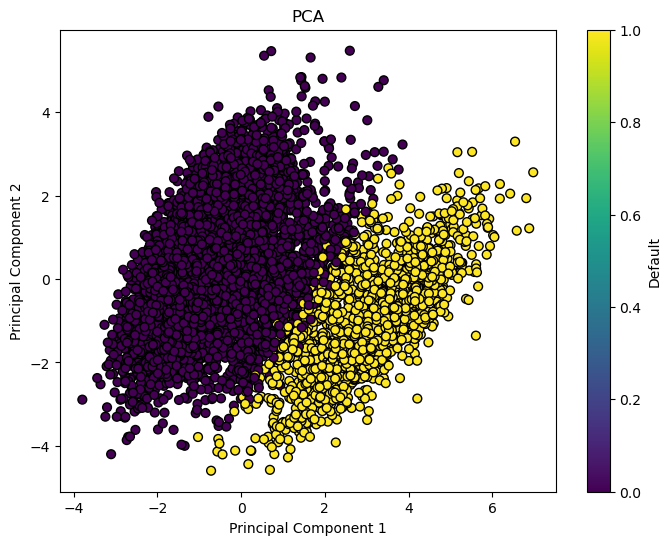

In [6]:
# Step 1: Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Step 2: PCA
# Separate features and target variable
X = df_train
y = df['default']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Step 5: Evaluation
# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can visualize the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Default')
plt.show()


Predicted Probabilities: [1.57187000e-08 1.04410526e-01 1.00000000e+00 ... 2.31159900e-05
 2.36875442e-04 4.76619142e-02]


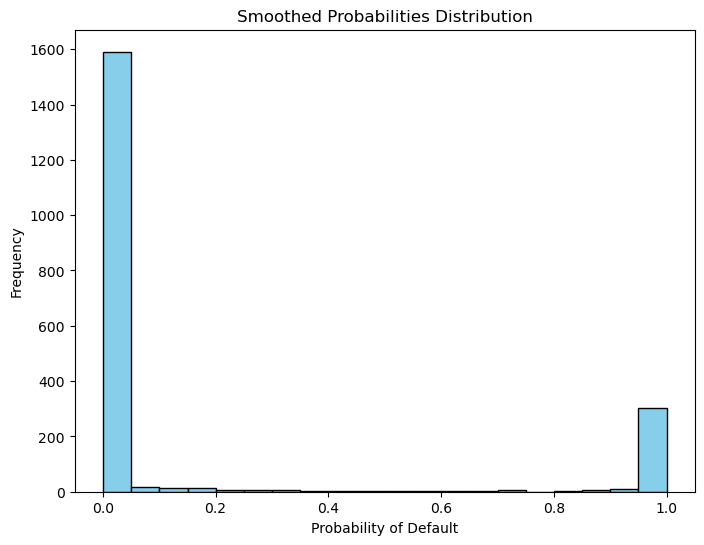

In [7]:
from sklearn.linear_model import LogisticRegression

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict probabilities
probabilities = logreg_model.predict_proba(X_test)[:,1]  # Probability of class 1 (default)

# Optionally, you can print the probabilities for better understanding
print("Predicted Probabilities:", probabilities)

# Plot smoothed probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities, bins=20, color='skyblue', edgecolor='black')
plt.title('Smoothed Probabilities Distribution')
plt.xlabel('Probability of Default')
plt.ylabel('Frequency')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

# Predict binary labels based on probabilities (using a threshold of 0.5)
predicted_labels = (probabilities >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9895


In [9]:
def format_Row(row):
    # Assuming row is a dataframe


    # Calculate the payment_to_income ratio
    row['payment_to_income'] = row['loan_amt_outstanding'] / row['income']
        
    # Calculate the debt_to_income ratio
    row['debt_to_income'] = row['total_debt_outstanding'] / row['income']

    row = row.loc[:,column_selected]

    return row

def expectedExposure(row):
    row = format_Row(row)
    row["PD"] = logreg_model.predict_proba(row.values)[:,1] 
    row["EE"] = row["loan_amt_outstanding"]*0.9*row["PD"]

    return row

expectedExposure(df.sample(n=10))


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,payment_to_income,debt_to_income,PD,EE
7335,2,3450.107901,9646.004085,71179.30189,5,676,0.048471,0.135517,1.873995e-05,5.818937e-02
3768,1,3646.526394,9055.105274,75363.09995,5,752,0.048386,0.120153,6.468999e-07,2.123044e-03
6284,0,3460.959306,629.886937,62988.69367,5,715,0.054946,0.010000,1.395156e-11,4.345720e-08
376,0,1798.781031,1125.853784,30965.75281,6,648,0.058089,0.036358,3.815673e-07,6.177204e-04
1121,0,2736.434392,2956.907061,46815.77975,6,625,0.058451,0.063160,4.254458e-08,1.047784e-04
267,0,3648.628104,2660.769199,53321.52026,3,558,0.068427,0.049900,1.301295e-07,4.273149e-04
1961,5,3944.134878,24299.453170,77410.90442,4,586,0.050951,0.313902,9.999998e-01,3.549721e+03
2521,1,5587.232892,7675.063376,87129.74882,4,701,0.064125,0.088088,7.587612e-09,3.815438e-05
6367,1,3509.353279,6813.276157,76484.08687,8,763,0.045883,0.089081,2.819974e-10,8.906655e-07
1102,4,4729.294476,21489.179780,78427.63346,3,553,0.060301,0.274000,9.999856e-01,4.256304e+03


In [13]:
print(df.shape)
df.head()

(10000, 8)


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [17]:
df[["fico_score"]].describe()

,fico_score
count,10000.000000
mean,637.557700
std,60.657906
min,408.000000
25%,597.000000
50%,638.000000
75%,679.000000
max,850.000000


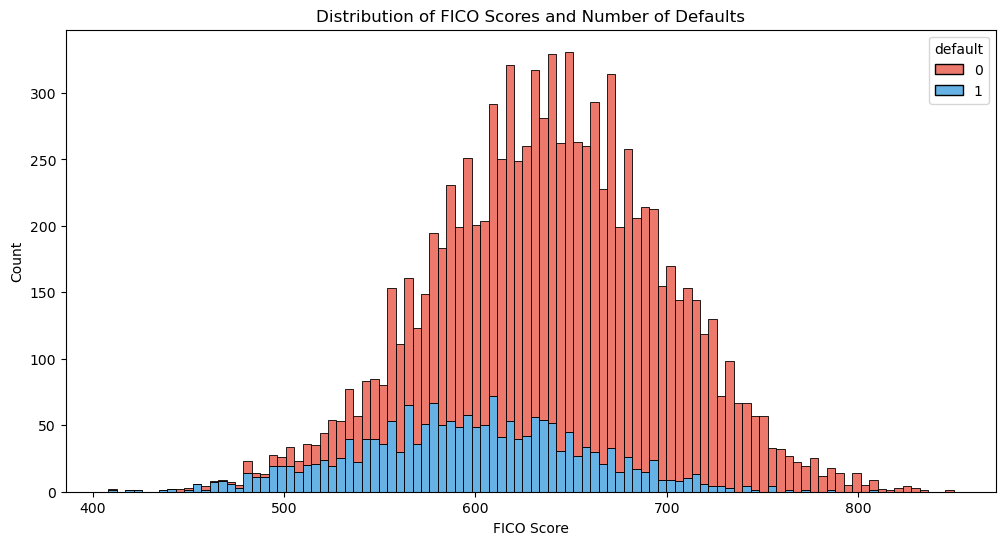

In [22]:
import seaborn as sns

# Step 1: Extract the necessary columns
fico_scores = df['fico_score']
defaults = df['default']

# Step 2: Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='fico_score', hue='default', multiple='stack', bins=100, palette=['#e74c3c', '#3498db'])

# Add titles and labels
plt.title('Distribution of FICO Scores and Number of Defaults')
plt.xlabel('FICO Score')
plt.ylabel('Count')

# Display the plot
plt.show()

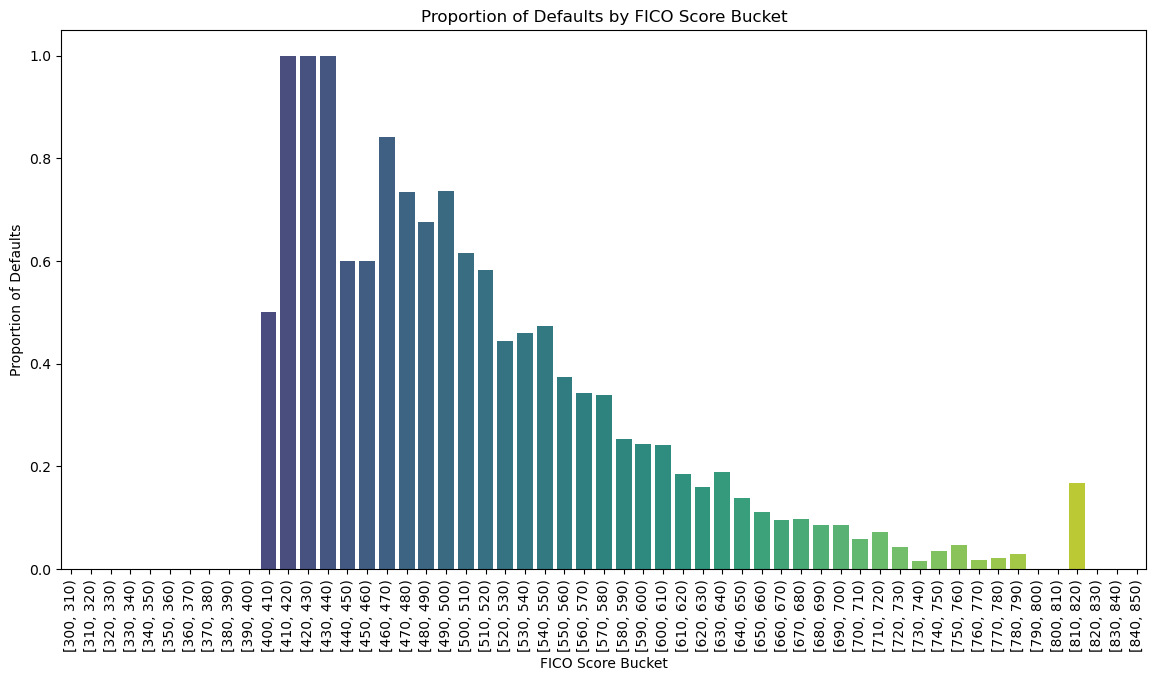

In [25]:
# Create bins for the FICO scores
bin_edges = list(range(300, 851, 10))  # Adjust the step size for the desired bucket size (e.g., 10)
df['fico_bin'] = pd.cut(df['fico_score'], bins=bin_edges, right=False)

# Calculate the proportion of defaults for each bin
default_proportions = df.groupby('fico_bin')['default'].mean().reset_index()
default_proportions['fico_bin'] = default_proportions['fico_bin'].astype(str)

# Plot the proportions
plt.figure(figsize=(14, 7))
sns.barplot(x='fico_bin', y='default', data=default_proportions, palette='viridis')

# Add titles and labels
plt.title('Proportion of Defaults by FICO Score Bucket')
plt.xlabel('FICO Score Bucket')
plt.ylabel('Proportion of Defaults')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

In [92]:
# L1 will record the cummulative number of value that we have up to that fico_score
L1 = [0 for i in range(851)]
for ele in df["fico_score"]:
    L1[ele] += 1

cumSum = 0
for i,ele in enumerate(L1):
    cumSum += ele
    L1[i] = cumSum

df_sorted = df.sort_values(by="fico_score")
df_sorted = df_sorted.groupby("fico_score")['default'].sum().to_frame()

# L2 will record the number of default up to that fico_score
L2 = [0 for i in range(851)]
for ind in df_sorted.index:
    L2[int(ind)] = int(df_sorted.loc[ind])

for i in range(1,len(L2)):
    L2[i] += L2[i-1]

In [131]:
def log_likelihood(n, k):
    p = k/n
    if p==0 or p==1:
        return 0
    return k*np.log(p)+ (n-k)*np.log(1-p)

def Total_llh(bins):
    K = []
    N = []
    r = len(bins)
    left = 300
    for ele in bins:
        k_i = L2[ele] - L2[left]
        n_i = L1[ele] - L1[left]
        K.append(k_i)
        N.append(n_i)
        left = ele
    if left < 850:
        k_i = L2[850] - L2[left]
        n_i = L1[850] - L1[left]
        K.append(k_i)
        N.append(n_i)

    # print("Number of element per bins", N,"Number of default per bins :",K)
    res = 0
    for i in range(r+1):
        res += log_likelihood(N[i],K[i])
    return res

print(Total_llh([]))

-4790.393891227814


In [102]:
import math

In [150]:
# Now knowing the number of bins what is the maximum we can get for Total_llh ?
# With a greedy recursive algorithme :

def best_param(prev_bins):
    best = -math.inf
    best_new_bin = 0
    for i in range(408,851,10):
        if i not in prev_bins:
            prev_bins.append(i)
            prev_bins.sort()
            tot = Total_llh(prev_bins) 
            if tot > best:
                best_new_bin = i
                best = tot
            prev_bins.remove(i)
    return best_new_bin

[498, 518, 548, 578, 608, 638, 658, 698, 718, 558]


In [155]:
def Best_Bin(numBins):
    L = []
    for i in range(numBins):
        K = best_param(L)
        L.append(K)
    return L

Best_Bin(10)


[498, 518, 548, 578, 608, 638, 658, 698, 718, 558]